In [1]:
# Importing Qiskit

import qiskit as q
%matplotlib inline

In [3]:
# Check qiskit version
q.__qiskit_version__

{'qiskit-terra': '0.16.1',
 'qiskit-aer': '0.7.1',
 'qiskit-ignis': '0.5.1',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.1',
 'qiskit': '0.23.1'}

In [4]:
# Create a circuit with two quantum bits and two classical bits
circuit = q.QuantumCircuit(2, 2)

# Apply Hadamard(H) gate for the first qubit
circuit.h(0)

# Controlled NOT gate (CNOT) applied to 0 and 1 qubits.
circuit.cx(0, 1)

# Measure qubits in classical bits
circuit.measure([0, 1], [0, 1])

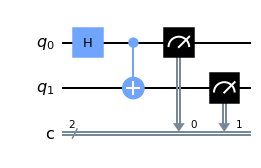

In [5]:
# Draw the circuit
circuit.draw(output = 'mpl')

In [6]:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [7]:
# Execute circuit using Qiskit's  simulator

simulator = q.Aer.get_backend('qasm_simulator')

# Execute the circuit using the simulator. It will run for 1000 times.

job = q.execute(circuit, simulator, shots = 1000)

In [8]:
# Results from the job

results_sim_loc = job.result()
results_sim_loc

Result(backend_name='qasm_simulator', backend_version='0.7.1', qobj_id='474901d9-900c-4090-bb6b-62c6270362fb', job_id='b02d1525-a6b3-4592-acd8-62a658821c35', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x0': 515, '0x3': 485}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit7', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=3427232322, time_taken=0.0030222170000000002, metadata={'fusion': {'enabled': False}, 'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 8})], date=2020-12-03T22:33:26.649590, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_version='0.7.1'), metadata={'max_memory_mb': 3929, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.003129801}, time_taken=0.00333380699

In [9]:
counts_sim_loc = results_sim_loc.get_counts(circuit)
counts_sim_loc

{'00': 515, '11': 485}

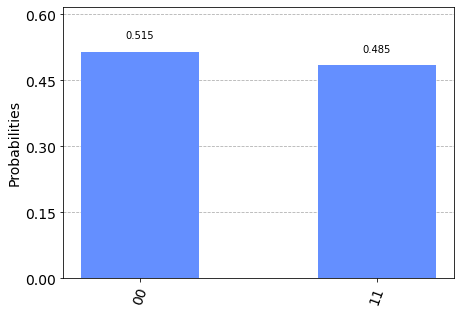

In [10]:
# Creating a histogram of counts

from qiskit.visualization import plot_histogram

plot_histogram(counts_sim_loc)